In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/BME548L_Project'

/content/drive/MyDrive/BME548L_Project


In [4]:
net = cv2.dnn.readNetFromDarknet("darknet/cfg/yolov3_custom_test.cfg",r"trained_weights/yolov3_custom_last.weights")

In [5]:
classes = []

with open("custom_data/classes.names",'r') as f:
  classes = f.read().splitlines()

print(classes)

['Scalpel ', 'Straight Dissection Clamp', 'Straight Mayo Scissor', 'Curved Mayo Scissor']


In [6]:
img = cv2.imread("custom_data/tesouracurva674.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

In [7]:
blob.shape

(1, 3, 416, 416)

In [8]:
net.setInput(blob)

output_layers_name = net.getUnconnectedOutLayersNames()

layerOutputs = net.forward(output_layers_name)

boxes =[]
confidences = []
class_ids = []

In [9]:
for output in layerOutputs:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.6:
      center_x = int(detection[0] * 416)
      center_y = int(detection[1] * 416)
      w = int(detection[2] * 416)
      h = int(detection[3]* 416)
      x = int(center_x - w/2)
      y = int(center_y - h/2)
      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)

In [10]:
len(boxes)

1

In [11]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [12]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size =(len(boxes),3))

In [13]:
print(indexes)

[[0]]


In [14]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confidence = str(round(confidences[i],2))
  color = colors[i]
  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)


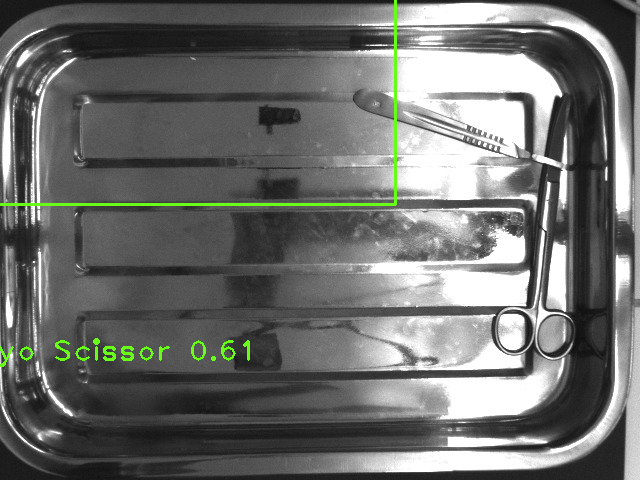

In [15]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)